# **Coding and analysis tasks - Regression of biodiversity against climate indices**

## **Data description**

The data comes from the field of ecology and environment. The data file
called data_biodiversity.csv is available on Canvas. This data contains 12,337 records (rows in data table). Each record corresponds to a hexagonally-shaped region corresponding to a location within the United States. All 12,337 regions (also referred to as hexes) cover together the entire United States. For each hex following data is given: 11 environmental variables related to climate ('JanMeanTem', 'JulyMeanTe', 'pptMean'), terrain ('elevationM', 'elevationS', 'slopeMean', 'slopeStdev'), and land cover ('lulcDecicu', 'lulcEvergr', 'lulcMixFor', 'lulcWater') within the hex, spatial coordinates ('XCoord', 'YCoord') of the center of the hex, and the value of 'bbsrich'. The 'bbsrich' is the number of different species of birds living within the hex. This is one of possible measures of biodiversity. The purpose of this project is to use data exploratory analysis and different regression methods you have learned so far to build a model of dependence between 12 environmental variables and 'bbsrich'.

'JanMeanTem': January mean temperature (unit: celsius degrees)

'JulyMeanTe': July mean temperature (unit: celsius degrees)

'pptMean': annual precipitation average (unit: millimetres)

'elevationM': Elevation mean (unit: meter)

'elevationS': Elevation standard deviation (describing the terrain variability)

'slopeMean': Slope mean

'slopeStdev': slope standard deviation

'lulcDecicu': the land cover percentage of deciduous forest

'lulcEvergr': the land cover percentage of Evergreen forest

'lulcMixFor': the land cover percentage of mixed forest

'lulcWater': the land cover percentage of water bodies
       
'XCoord': longitude (degree)

'YCoord': latitude (degree)

'bbsrich': biodiversity


## **Tasks**

**Requirements:**
* Perform data exploratory analysis (based on what you have learned in 1.2 and 1.3) on the biodiversity data. Are there any strong correlations between different variables?
* Generate various plots using `seaborn` package to visualize the different variables (independent and dependent variables), and summarize the general trend and pattern. Are there any geographical patterns (how do those climate, terrain, land use and biodiversity variables change with latitude and longitude?)
* Use `statsmodels` to perform multivariate regression and analyze which environmental variables have the biggest influence on biodiversity? Evaluate and analyze the model performance using various metrics (RMSE, R squares, confidential intervals of coefficients, residual plots, and q-q plot).
* Use `sklearn` to perform  OLS, ridge, LASSO, and PCR regressions on the biodiversity data (using 'bbsrich' as dependent variable) and analyze the results and performance of different methods.

**Tip: How to import data from your google drive?**

Before doing the tasks, upload the csv file to a folder (named as data) in your google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/data
%ls # then you should see the data file
biodiv_data = pd.read_csv('data.csv')

/content/drive/My Drive/data
data.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Having an overall look at the data

In [ ]:
biodiv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12337 entries, 0 to 12336
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hexID       12337 non-null  int64  
 1   JanMeanTem  12337 non-null  float64
 2   JulyMeanTe  12337 non-null  float64
 3   pptMean     12337 non-null  float64
 4   seasMean    12337 non-null  float64
 5   elevationM  12337 non-null  int64  
 6   elevationS  12337 non-null  float64
 7   lulcDecicu  12337 non-null  float64
 8   lulcEvergr  12337 non-null  float64
 9   lulcMixFor  12337 non-null  float64
 10  lulcWater   12337 non-null  float64
 11  slopeMean   12337 non-null  float64
 12  slopeStdev  12337 non-null  float64
 13  XCoord      12337 non-null  float64
 14  YCoord      12337 non-null  float64
 15  bbsrich     12337 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.5 MB


In [ ]:
biodiv_data.dtypes

hexID           int64
JanMeanTem    float64
JulyMeanTe    float64
pptMean       float64
seasMean      float64
elevationM      int64
elevationS    float64
lulcDecicu    float64
lulcEvergr    float64
lulcMixFor    float64
lulcWater     float64
slopeMean     float64
slopeStdev    float64
XCoord        float64
YCoord        float64
bbsrich       float64
dtype: object

In [ ]:
biodiv_data.isna().sum()

hexID         0
JanMeanTem    0
JulyMeanTe    0
pptMean       0
seasMean      0
elevationM    0
elevationS    0
lulcDecicu    0
lulcEvergr    0
lulcMixFor    0
lulcWater     0
slopeMean     0
slopeStdev    0
XCoord        0
YCoord        0
bbsrich       0
dtype: int64

In [ ]:
biodiv_data.head(15)

,hexID,JanMeanTem,JulyMeanTe,pptMean,seasMean,elevationM,elevationS,lulcDecicu,lulcEvergr,lulcMixFor,lulcWater,slopeMean,slopeStdev,XCoord,YCoord,bbsrich
0,13554,-18.251,19.000,565.623,37.251,328,4.7,0.04945,0.00000,0.43681,0.10165,0.095,0.087,-95.086403,49.295887,193.725692
1,18789,-15.129,19.871,357.733,35.000,731,10.4,0.00000,0.00000,0.00000,0.00000,0.235,0.191,-104.658256,49.117530,88.408062
2,25367,-5.926,19.889,568.333,25.815,693,336.8,0.00000,0.09091,0.00000,0.00000,10.475,8.463,-119.670818,49.113730,202.459189
3,24503,-9.375,14.344,1150.842,23.719,1023,219.9,0.00000,1.00000,0.00000,0.00000,5.917,2.970,-117.371076,49.109173,185.113130
4,16185,-18.212,17.985,445.283,36.197,588,28.3,0.38182,0.00000,0.00000,0.00000,0.352,0.285,-99.760629,49.098623,179.614359
5,22200,-8.117,18.950,323.818,27.067,1056,28.9,0.00000,0.00000,0.00000,0.00000,0.535,0.345,-111.820038,49.095739,135.564050
6,22486,-9.667,16.667,341.286,26.333,1256,41.2,0.00000,0.00000,0.00000,0.00000,0.970,0.538,-112.471310,49.095761,192.054981
7,21910,-10.365,17.770,403.250,28.135,1140,38.9,0.00000,0.19048,0.00000,0.00000,0.841,0.491,-111.169033,49.092317,150.943736
8,22768,-10.339,15.694,443.630,26.032,1330,35.7,0.00000,0.45312,0.00000,0.06250,1.302,0.768,-113.122774,49.092380,218.609419
9,17602,-16.000,19.949,398.782,35.949,582,7.5,0.00000,0.00000,0.00000,0.00000,0.164,0.138,-102.380388,49.083470,161.088807


In [ ]:
biodiv_data.describe()

,hexID,JanMeanTem,JulyMeanTe,pptMean,seasMean,elevationM,elevationS,lulcDecicu,lulcEvergr,lulcMixFor,lulcWater,slopeMean,slopeStdev,XCoord,YCoord,bbsrich
count,12337.000000,12337.000000,12337.000000,12337.000000,12337.000000,12337.000000,12337.000000,12337.000000,12337.000000,12337.000000,12337.000000,12337.000000,12337.000000,12337.000000,12337.000000,12337.000000
mean,14252.221853,-2.081223,22.233097,789.101669,24.314312,761.204669,86.597730,0.088481,0.116866,0.118520,0.034380,1.575862,1.072505,-98.911447,38.983747,142.690141
std,7821.307786,7.687091,4.801909,446.808562,5.396907,716.417636,105.477587,0.214928,0.242317,0.241608,0.136648,1.969857,1.249618,13.644491,5.436793,29.527012
min,302.000000,-24.102000,2.692000,0.000000,5.805000,-57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-124.795596,24.549318,0.000000
25%,7493.000000,-7.859000,19.357000,413.606000,20.997000,211.000000,17.900000,0.000000,0.000000,0.000000,0.000000,0.343000,0.217000,-109.981825,34.737324,121.731868
50%,14201.000000,-2.736000,22.698000,742.683000,24.224000,453.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.680000,0.426000,-98.914235,39.099895,137.444354
75%,21213.000000,4.000000,26.000000,1108.930000,27.638000,1269.000000,122.900000,0.030960,0.081790,0.075500,0.001550,2.142000,1.678000,-88.412599,43.361752,166.133732
max,27602.000000,21.000000,35.618000,6049.735000,37.829000,3542.000000,930.200000,1.000000,1.000000,1.000000,0.998450,15.714000,8.463000,-66.870449,49.295887,230.394562


In [ ]:
#sns.pairplot(biodiv_data,kind='scatter')

Checking for correlation within the data

In [ ]:
# calculate correlation matrices
biodiv_data.corr(method='pearson')

,hexID,JanMeanTem,JulyMeanTe,pptMean,seasMean,elevationM,elevationS,lulcDecicu,lulcEvergr,lulcMixFor,lulcWater,slopeMean,slopeStdev,XCoord,YCoord,bbsrich
hexID,1.000000,-0.210921,-0.425030,-0.518692,-0.077746,0.660795,0.580700,-0.420015,0.408151,-0.424877,-0.146274,0.525983,0.563992,-0.990946,0.270882,0.243048
JanMeanTem,-0.210921,1.000000,0.718223,0.277808,-0.785311,-0.421537,-0.231154,-0.025578,-0.067698,0.083084,0.148466,-0.260778,-0.223253,0.114649,-0.877876,-0.386574
JulyMeanTe,-0.425030,0.718223,1.000000,0.034429,-0.133249,-0.622373,-0.598957,0.031759,-0.527852,0.056065,0.027478,-0.665855,-0.615601,0.368806,-0.679894,-0.618668
pptMean,-0.518692,0.277808,0.034429,1.000000,-0.365062,-0.495299,-0.125173,0.286318,0.260169,0.394274,0.183864,0.027668,-0.065585,0.458905,-0.168053,0.001664
seasMean,-0.077746,-0.785311,-0.133249,-0.365062,1.000000,0.046658,-0.203679,0.064689,-0.373232,-0.068458,-0.187019,-0.221008,-0.229743,0.164847,0.645467,0.000154
elevationM,0.660795,-0.421537,-0.622373,-0.495299,0.046658,1.000000,0.656097,-0.233864,0.349839,-0.233069,-0.206290,0.596819,0.615388,-0.620824,0.200224,0.302410
elevationS,0.580700,-0.231154,-0.598957,-0.125173,-0.203679,0.656097,1.000000,-0.095865,0.557125,-0.110425,-0.119860,0.923862,0.944685,-0.564275,0.182648,0.393454
lulcDecicu,-0.420015,-0.025578,0.031759,0.286318,0.064689,-0.233864,-0.095865,1.000000,-0.176047,0.054958,-0.054270,-0.033916,-0.047695,0.423976,0.018519,0.006050
lulcEvergr,0.408151,-0.067698,-0.527852,0.260169,-0.373232,0.349839,0.557125,-0.176047,1.000000,-0.056310,-0.059701,0.638117,0.569026,-0.431831,0.138527,0.420897
lulcMixFor,-0.424877,0.083084,0.056065,0.394274,-0.068458,-0.233069,-0.110425,0.054958,-0.056310,1.000000,-0.054690,-0.066716,-0.086035,0.413937,-0.119138,0.020763


In [ ]:
biodiv_data.corr(method='spearman')

,hexID,JanMeanTem,JulyMeanTe,pptMean,seasMean,elevationM,elevationS,lulcDecicu,lulcEvergr,lulcMixFor,lulcWater,slopeMean,slopeStdev,XCoord,YCoord,bbsrich
hexID,1.000000,-0.190780,-0.413805,-0.652390,-0.092743,0.708930,0.634455,-0.591716,0.335518,-0.565657,-0.203547,0.560932,0.575271,-0.996040,0.255895,0.234422
JanMeanTem,-0.190780,1.000000,0.766570,0.273940,-0.786955,-0.488787,-0.261103,-0.134010,0.142540,0.048318,0.013466,-0.253823,-0.258405,0.125628,-0.876172,-0.399488
JulyMeanTe,-0.413805,0.766570,1.000000,0.195165,-0.265156,-0.585376,-0.577559,-0.021065,-0.256545,0.024921,-0.038571,-0.582480,-0.588649,0.366512,-0.753580,-0.631902
pptMean,-0.652390,0.273940,0.195165,1.000000,-0.275568,-0.666138,-0.375764,0.502337,0.177969,0.619671,0.273514,-0.262734,-0.289158,0.629994,-0.202640,-0.035684
seasMean,-0.092743,-0.786955,-0.265156,-0.275568,1.000000,0.182009,-0.121636,0.232897,-0.523054,-0.105355,-0.029278,-0.136438,-0.130259,0.155935,0.672080,0.020196
elevationM,0.708930,-0.488787,-0.585376,-0.666138,0.182009,1.000000,0.739090,-0.396329,0.160223,-0.387589,-0.319380,0.669208,0.662500,-0.689228,0.313862,0.253232
elevationS,0.634455,-0.261103,-0.577559,-0.375764,-0.121636,0.739090,1.000000,-0.198456,0.353502,-0.169491,-0.165557,0.965875,0.959423,-0.623995,0.241048,0.375939
lulcDecicu,-0.591716,-0.134010,-0.021065,0.502337,0.232897,-0.396329,-0.198456,1.000000,-0.221169,0.553537,0.213837,-0.110604,-0.104728,0.619139,0.145902,0.092402
lulcEvergr,0.335518,0.142540,-0.256545,0.177969,-0.523054,0.160223,0.353502,-0.221169,1.000000,0.208467,-0.004697,0.370580,0.367546,-0.365798,-0.092058,0.329181
lulcMixFor,-0.565657,0.048318,0.024921,0.619671,-0.105355,-0.387589,-0.169491,0.553537,0.208467,1.000000,0.209901,-0.088050,-0.089948,0.558533,-0.099306,0.125515


In [ ]:
biodiv_data.corr(method='kendall')

,hexID,JanMeanTem,JulyMeanTe,pptMean,seasMean,elevationM,elevationS,lulcDecicu,lulcEvergr,lulcMixFor,lulcWater,slopeMean,slopeStdev,XCoord,YCoord,bbsrich
hexID,1.000000,-0.120825,-0.275783,-0.521743,-0.069544,0.527838,0.456274,-0.442939,0.238261,-0.409460,-0.155512,0.398485,0.404440,-0.950797,0.166422,0.136023
JanMeanTem,-0.120825,1.000000,0.576287,0.192979,-0.608976,-0.342497,-0.180734,-0.099270,0.112604,0.031706,0.009093,-0.177214,-0.178411,0.077374,-0.719812,-0.267163
JulyMeanTe,-0.275783,0.576287,1.000000,0.138491,-0.184671,-0.420458,-0.416216,-0.016918,-0.173928,0.017570,-0.029782,-0.419980,-0.425328,0.235211,-0.557747,-0.443666
pptMean,-0.521743,0.192979,0.138491,1.000000,-0.200047,-0.493698,-0.262230,0.378460,0.136455,0.465330,0.210443,-0.180083,-0.197905,0.488436,-0.152410,-0.027613
seasMean,-0.069544,-0.608976,-0.184671,-0.200047,1.000000,0.119724,-0.092759,0.165606,-0.389718,-0.080504,-0.021132,-0.102175,-0.098395,0.113794,0.524844,0.009799
elevationM,0.527838,-0.342497,-0.420458,-0.493698,0.119724,1.000000,0.543486,-0.281022,0.101352,-0.274057,-0.248096,0.482247,0.474842,-0.502927,0.214213,0.162362
elevationS,0.456274,-0.180734,-0.416216,-0.262230,-0.092759,0.543486,1.000000,-0.136591,0.253238,-0.120016,-0.126704,0.841556,0.830248,-0.449575,0.163277,0.253915
lulcDecicu,-0.442939,-0.099270,-0.016918,0.378460,0.165606,-0.281022,-0.136591,1.000000,-0.179973,0.434249,0.179282,-0.073501,-0.067824,0.463500,0.104597,0.068565
lulcEvergr,0.238261,0.112604,-0.173928,0.136455,-0.389718,0.101352,0.253238,-0.179973,1.000000,0.159742,-0.003714,0.271091,0.265910,-0.263639,-0.074708,0.239515
lulcMixFor,-0.409460,0.031706,0.017570,0.465330,-0.080504,-0.274057,-0.120016,0.434249,0.159742,1.000000,0.172694,-0.062399,-0.063996,0.403509,-0.073121,0.089122


Understanding the correlation or lack of correlation between variables

1) Checking for the relationship between the January and July Temperatures. January and July temperature have negative correlations with the bidoversity and July has a stronger correlation. The average temperature in January is -2.08 degrees celsius and the average temperature in July is 22.3 degrees celsius. This might imply that the biodiversity in the united states thrives at lower temperatures than at higher temperatures. Also, January and July temperature have negative correlations with the latitude.  

In [ ]:
biodiv_data['JanMeanTem'].describe()

count    12337.000000
mean        -2.081223
std          7.687091
min        -24.102000
25%         -7.859000
50%         -2.736000
75%          4.000000
max         21.000000
Name: JanMeanTem, dtype: float64

In [ ]:
biodiv_data['JulyMeanTe'].describe()

count    12337.000000
mean        22.233097
std          4.801909
min          2.692000
25%         19.357000
50%         22.698000
75%         26.000000
max         35.618000
Name: JulyMeanTe, dtype: float64

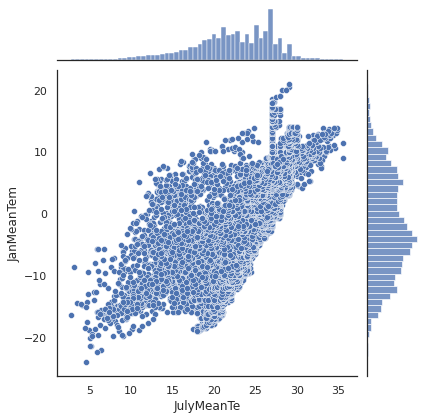

In [ ]:
#Noticed some correlation between the January and July mean Temperatures. Would carry out further exploration on this data.
sns.jointplot(x='JulyMeanTe',y='JanMeanTem', data=biodiv_data)

<Figure size 432x288 with 0 Axes>

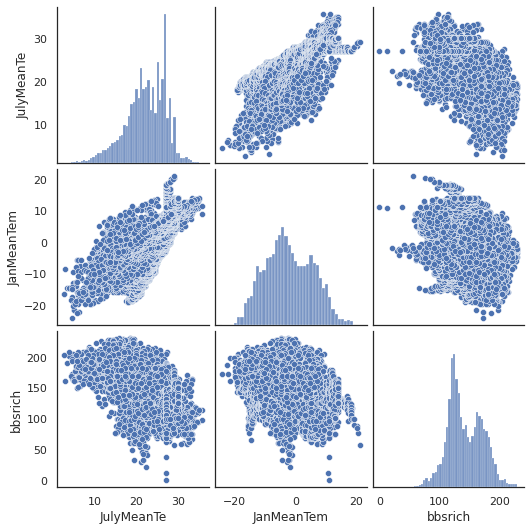

In [ ]:
#Checking the relationship between the January and July Temperatures and biodiversity
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.pairplot(biodiv_data, vars=['JulyMeanTe', 'JanMeanTem', 'bbsrich'], markers=["o", "s"]) #January and July temperature have negative correlations with the bidoversity. July having more correlation
plt.show()

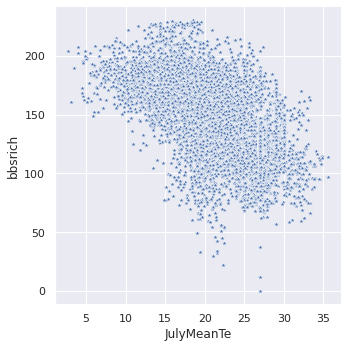

In [ ]:
#scatter plot of bbsrich vs JulyMeanTe
sns.set(style='darkgrid')
sns.relplot(x='JulyMeanTe',y='bbsrich',data=biodiv_data,marker ='*')

<Figure size 432x288 with 0 Axes>

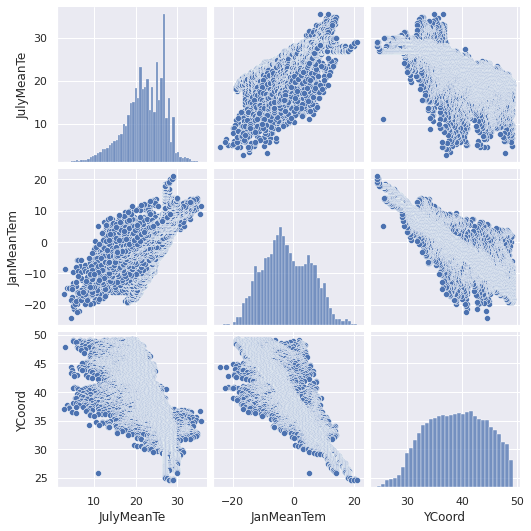

In [ ]:
#Checking the relationship between the January and July Temperatures and latitude
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.pairplot(biodiv_data, vars=['JulyMeanTe', 'JanMeanTem', 'YCoord'], markers=["o", "s"]) #January and July temperature have negative correlations with the latitude.
plt.show()

<Figure size 432x288 with 0 Axes>

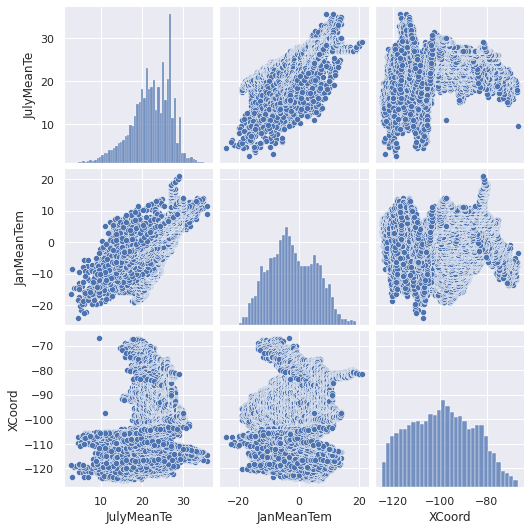

In [ ]:
#Checking the relationship between the January and July Temperatures and longitude
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.pairplot(biodiv_data, vars=['JulyMeanTe', 'JanMeanTem', 'XCoord'], markers=["o", "s"]) #January and July temperature have negative correlations with the longitude.
plt.show()

2) Exploring Latitude further to see any perculiar characteristics. Latitude seems to have a slightly uniform distribution. There seems to be no relationship between latitude and elevation and between latitude and slope. There seems to be no relationship or pattern between latitude and the land cover percentage of forest and water bodies. There also seems to be no change in biodiversity with latitude.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


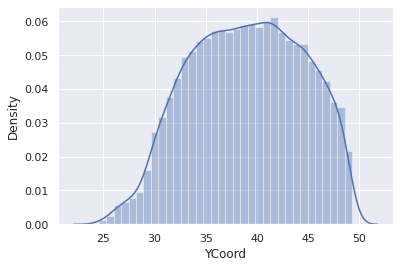

In [ ]:
#Checking the Histogram plot of latitude with default kernel
sns.distplot(biodiv_data['YCoord']) #Latitude seems to have a slightly uniform distribution

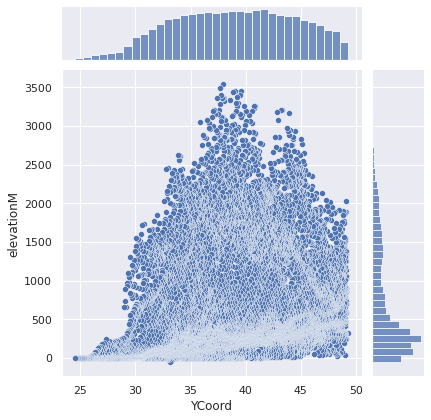

In [ ]:
#Checking for relationship between latitude and elevation
sns.jointplot(x='YCoord',y='elevationM', data=biodiv_data) # there seems to be no relationship between latitude and elevation

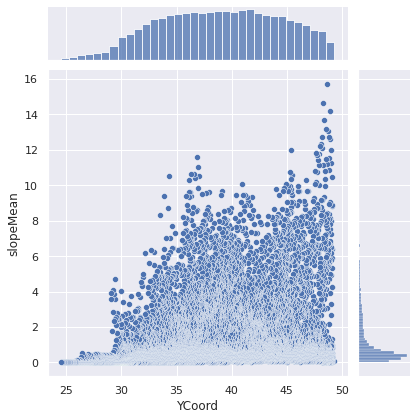

In [ ]:
#Checking for relationship between latitude and slope
sns.jointplot(x='YCoord',y='slopeMean', data=biodiv_data) # there seems to be no relationship between latitude and slope

<Figure size 432x288 with 0 Axes>

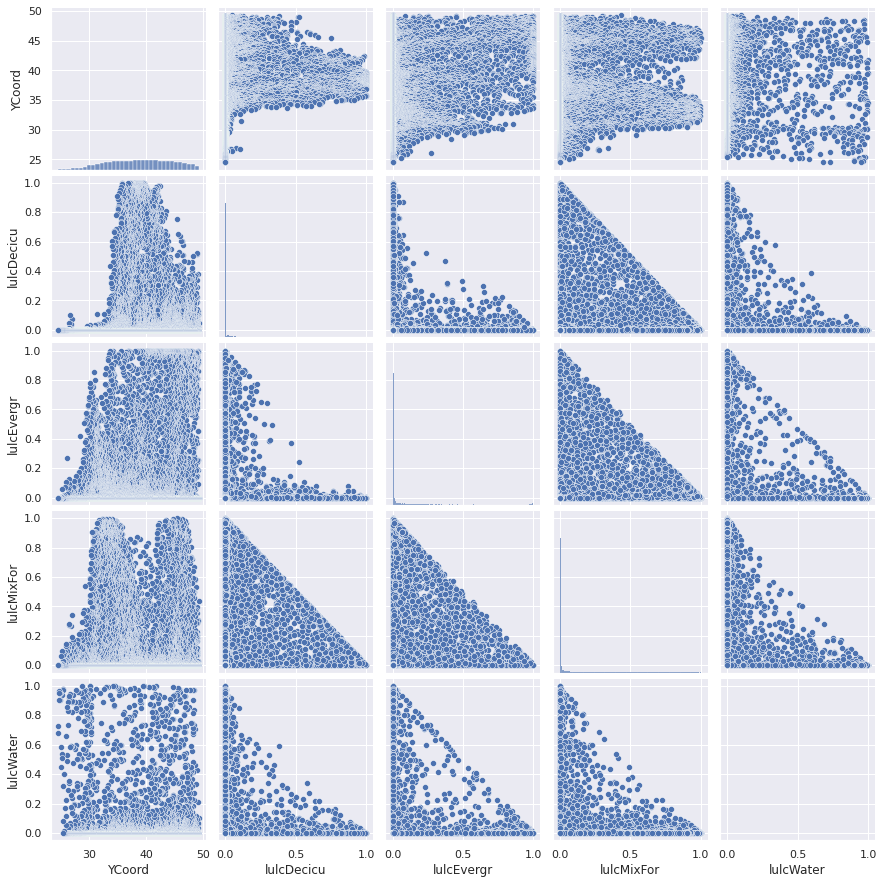

In [ ]:
#Checking the relationship between the latitude and Forest cover
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.pairplot(biodiv_data, vars=['YCoord', 'lulcDecicu', 'lulcEvergr','lulcMixFor','lulcWater'], markers=["o", "s"]) #there seems to be no relationship or pattern between latitude and the land cover percentage of forest and water bodies

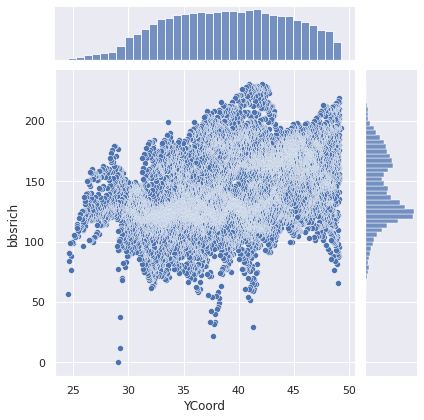

In [ ]:
#Checking for relationship between latitude and biodiversity
sns.jointplot(x='YCoord',y='bbsrich', data=biodiv_data) # there seems to be no change in biodiversity with latitude

3) Exploring Longitude further to see any perculiar characteristics. Longitude seems to have a slightly uniform distribution. There seems to be no relationship between longitude and elevation and between longitude and slope. There seems to be no relationship or pattern between longitude and the land cover percentage of forest and water bodies. There also seems to be no change in biodiversity with longitude

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


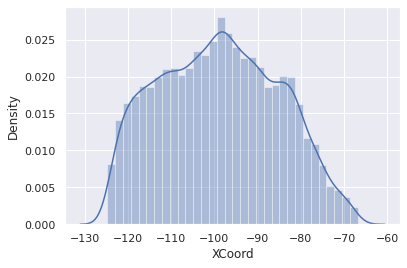

In [ ]:
#Checking the Histogram plot of longitude with default kernel
sns.distplot(biodiv_data['XCoord']) #longitude seems to have a slightly uniform distribution

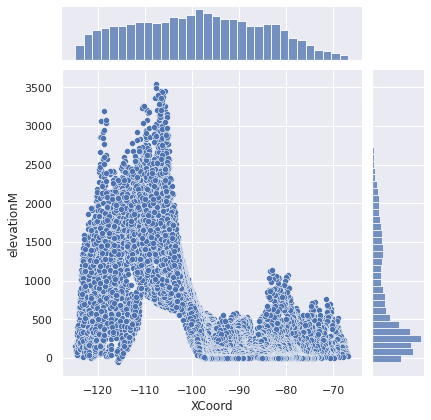

In [ ]:
#Checking for relationship between longitude and elevation
sns.jointplot(x='XCoord',y='elevationM', data=biodiv_data) # longitude seems to show some variation with elevation but it is a rather noisy data and no conclusion can be drawn.

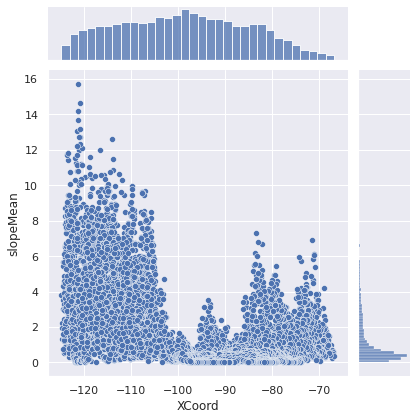

In [ ]:
#Checking for relationship between longitude and slope
sns.jointplot(x='XCoord',y='slopeMean', data=biodiv_data) # there seems to be no relationship between longitude and slope

<Figure size 432x288 with 0 Axes>

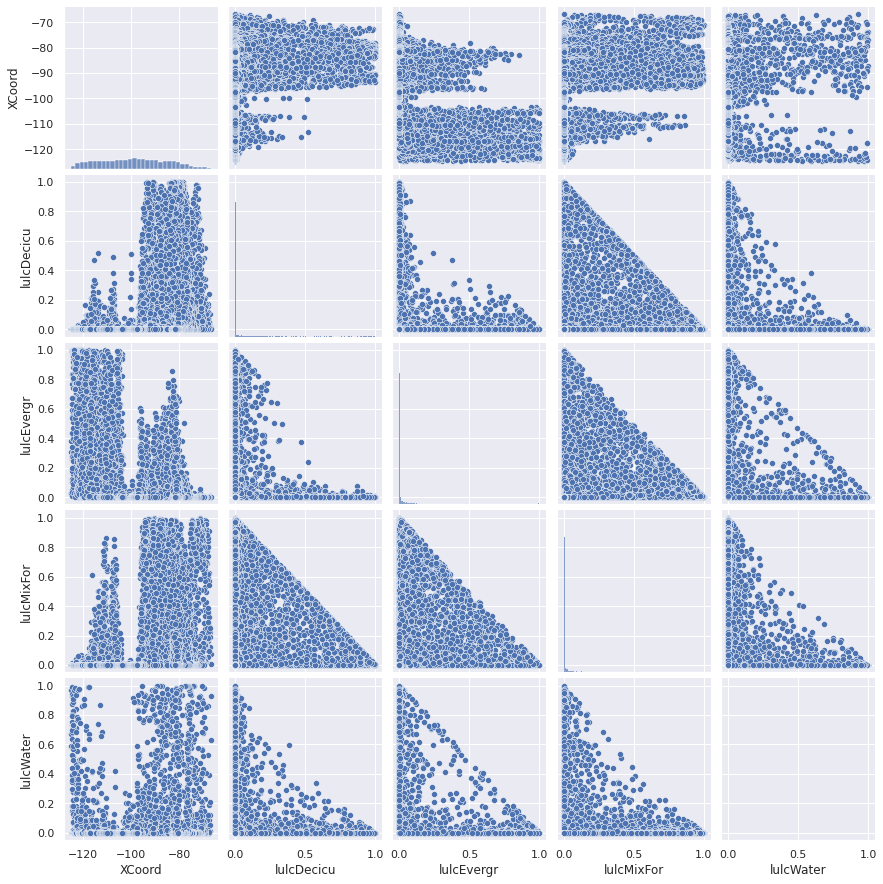

In [ ]:
#Checking the relationship between the longitude and Forest cover
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.pairplot(biodiv_data, vars=['XCoord', 'lulcDecicu', 'lulcEvergr','lulcMixFor','lulcWater'], markers=["o", "s"]) #there seems to be no relationship or pattern between longitude and the land cover percentage of forest and water bodies

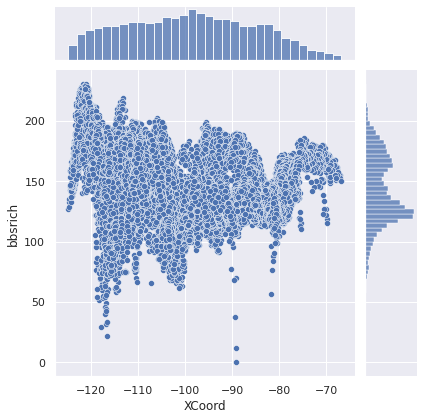

In [ ]:
#Checking for relationship between longitude and biodiversity
sns.jointplot(x='XCoord',y='bbsrich', data=biodiv_data) # there seems to be no significant change in biodiversity with longitude

4) Exploring the Biodiversity data. The biodiversity seems to have a bi-modal distribution. This indicates that the biodiversity has two groups that would respond differently with the most influencing independent variable which happens to be temperature. After carrying out further exploration on the biodiversity data and comparing with the January and July temperatures I observed the following:
The data shows the lower diodiversity peak (mode 1)  corresponds to the lower temperatures while the higher biodiversity peak (mode 2) corresponds more to the higher temperatures. This could depict there are two groups of species, one group thrives in lower temperatures and the other in higher, but overall more of the population thrives in lower temperatures.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


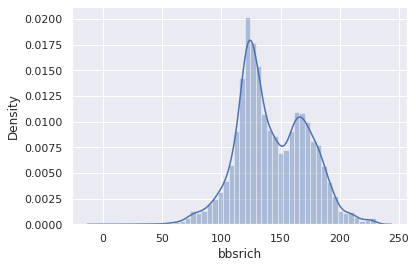

In [ ]:
#Histogram plot of bbsrich with default kernel
sns.distplot(biodiv_data['bbsrich']) # the biodiversity seems to have a bi-modal distribution. This indicates that the biodiversity has two groups that would respond differently with the most influencing independent variable which happens to be temperature.

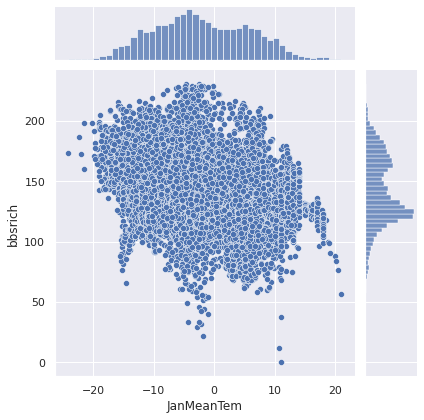

In [ ]:
# Histogram with scatterplot of bbsrich and JulyMeanTe
sns.jointplot(x='JanMeanTem',y='bbsrich', data=biodiv_data) # the data shows the lower diodiversity peak corresponds to the lower temperatures while the higher biodiversity peaks tends to correspond to the higher temperatures.

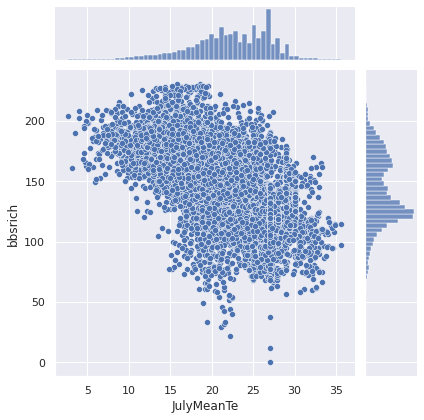

In [ ]:
# Histogram with scatterplot of bbsrich and JulyMeanTe
sns.jointplot(x='JulyMeanTe',y='bbsrich', data=biodiv_data) # the data shows the lower diodiversity peak corresponds to the lower temperatures while the higher biodiversity peaks tends to correspond to the higher temperatures.

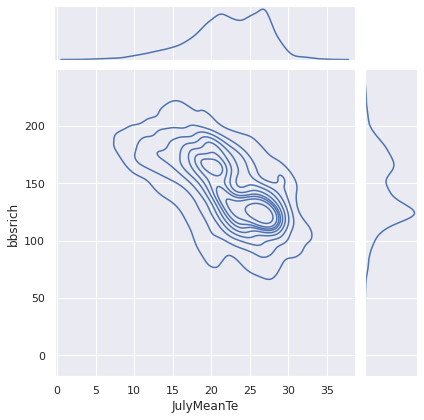

In [ ]:
#kernel density estimation to visualize bivariate distribution.
sns.jointplot(x='JulyMeanTe',y='bbsrich', kind='kde', data=biodiv_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


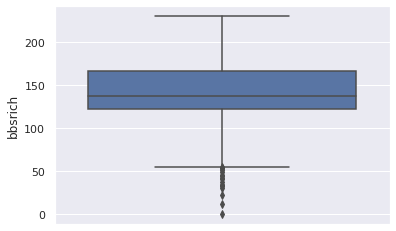

In [ ]:
# create boxplot for the 'JulyMeanTe' column
sns.boxplot(y=biodiv_data['bbsrich'],orient='h')

In [ ]:
#sns.catplot(x= 'bbsrich',y='hexID',data = biodiv_data, kind='bar')

In [ ]:
biodiv_data['bbsrich'].describe()

count    12337.000000
mean       142.690141
std         29.527012
min          0.000000
25%        121.731868
50%        137.444354
75%        166.133732
max        230.394562
Name: bbsrich, dtype: float64

In [ ]:
#sns.catplot(x='bbsrich', y = 'hexID',data = biodiv_data, kind = 'box')

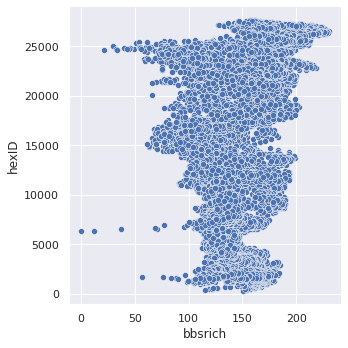

In [ ]:
sns.relplot(x='bbsrich', y = 'hexID',data = biodiv_data, kind = 'scatter')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


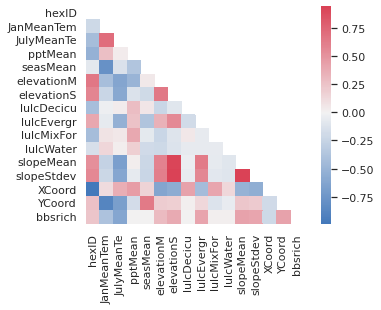

In [ ]:
# Correlation graph
corr_bio = biodiv_data.corr() # calculate the correlation matrix
sns.set(style='white')
cmap=sns.diverging_palette(250,8,as_cmap=True)
mask = np.triu(np.ones_like(corr_bio, dtype=np.bool)) # create the mask to mask out the upper triangle
sns.heatmap(corr_bio,square=True,cmap=cmap,mask=mask,center=0)

# Q.1: Thoughts on the correlation between variables.

After checking for correlation between the different variables using the Pearson, Spearman and Kendall correlation methods. I observed the following:

1) There is correlation between the January and July mean temperature. They both increase linearly (positive correlation) . This makes sense because temperature increases over the year between January to July. Plotting the relationship between January and July temperatures and the biodiversity, it was observed that the July temperatures had a high negative correlation with bio diversity. This can be said to mean that as the temperature increases, the different species of birds that dwell within the United states decreases. There was also some decrease in birds species in January but this correlation is too low to make any conclusions.

2) The July mean temperatures is correlated negatively with parameters such as elevation, slope and latitude. This makes sense because as you move closer to the equator the temperature increases also the biodiversity decreased with increase in July mean temperature.

3) Elevation also correlates positively with the slope which makes sense as slope is change in elevation so as the elevation increases the slope is expected to increase.

4) The Land cover evergreen correlates positively with the elevation standard deviation and this tells us that the evergreen vegetation positively changes with elevation variation in the united states.

5) Finally the biodiversity has a strong positive correlation with the July mean temperature only. More analysis is required to verify this information and would be discussed in the following discussions.

#Q2: Summary of General Trends and Patterns Within the data Based on Visualization
After checking for the correlation between the different variables I explored this correlations to check for patterns and this can be summarized below.

1) Checking for the relationship between the January and July Temperatures. January and July temperature have negative correlations with the bidoversity and July has a stronger correlation. The average temperature in January is -2.08 degrees celsius and the average temperature in July is 22.3 degrees celsius. This might imply that the biodiversity in the united states thrives at lower temperatures than at higher temperatures. Also, January and July temperature have negative correlations with the latitude.


2) Exploring Latitude further to see any perculiar characteristics. Latitude seems to have a slightly uniform distribution. There seems to be no relationship between latitude and elevation and between latitude and slope. There seems to be no relationship or pattern between latitude and the land cover percentage of forest and water bodies. There also seems to be no change in biodiversity with latitude.


3) Exploring Longitude further to see any perculiar characteristics. Longitude seems to have a slightly uniform distribution. There seems to be no relationship between longitude and elevation and between longitude and slope. There seems to be no relationship or pattern between longitude and the land cover percentage of forest and water bodies. There also seems to be no change in biodiversity with longitude.

4) Exploring the Biodiversity data. The biodiversity seems to have a bi-modal distribution. This indicates that the biodiversity has two groups that would respond differently with the most influencing independent variable which happens to be temperature. After carrying out further exploration on the biodiversity data and comparing with the January and July temperatures I observed the following: The data shows the lower diodiversity peak (mode 1) corresponds to the lower temperatures while the higher biodiversity peak (mode 2) corresponds more to the higher temperatures. This could depict there are two groups of species, one group thrives in lower temperatures and the other in higher, but overall more of the population thrives in lower temperatures.

In [ ]:
# import packages
import sklearn.linear_model as slm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split # partition data into training set and test set

y=biodiv_data['bbsrich']
X=biodiv_data.drop('bbsrich',axis=1)
LR=slm.LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25) # split the input data as training dataset (75%) and test dataset (25%)
LR.fit(X_train,Y_train) # train the model
predict=LR.predict(X_test) # make predictions on the test dataset
predict_train=LR.predict(X_train) # make predictions on the training dataset

# the accuracy assessment on the test dataset
print(mean_squared_error(Y_test,predict,squared=False))
print(mean_absolute_error(Y_test,predict))
print(r2_score(Y_test,predict))

# you can also check the accuracy on the training dataset
print(mean_squared_error(Y_train,predict_train,squared=False))
print(mean_absolute_error(Y_train,predict_train))
print(r2_score(Y_train,predict_train))


21.688646479022303
16.452077982868666
0.45935004215291864
21.97215795119006
16.526424023204594
0.4465773937163221


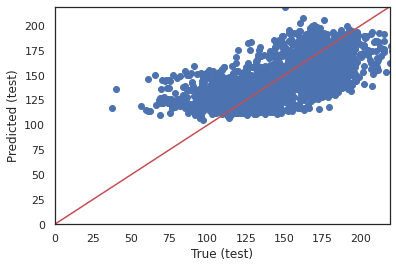

In [ ]:
# plot of predictions vs. observations to check the model performance
lineStart=0
lineEnd=predict.max()
plt.figure()
plt.scatter(Y_test,predict)
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r') # 45 degree line
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.xlabel('True (test)')
plt.ylabel('Predicted (test)')
plt.show()

In [ ]:
# check the regression coefficient
LR.coef_

array([ 3.49486449e-03, -1.20085826e+03,  1.19735782e+03, -1.37225690e-02,
       -1.20188116e+03, -9.62011289e-03,  2.80310156e-02,  8.41596432e+00,
        2.98826088e+01,  1.02839760e+01,  3.82856679e+00, -2.56199071e+00,
        1.93621364e+00,  2.12128173e+00,  4.60434260e-01])

In [ ]:
#Calling the columns of the data to compare with regression coefficients above.

biodiv_data.columns

Index(['hexID', 'JanMeanTem', 'JulyMeanTe', 'pptMean', 'seasMean',
       'elevationM', 'elevationS', 'lulcDecicu', 'lulcEvergr', 'lulcMixFor',
       'lulcWater', 'slopeMean', 'slopeStdev', 'XCoord', 'YCoord', 'bbsrich'],
      dtype='object')

In [ ]:
#Use statsmodel for multivariate regresiion
import statsmodels.api as sm
Y=biodiv_data['bbsrich']
X=biodiv_data[biodiv_data.columns[:-1]] # select all other variables as predictors (independent variables)
#X=data_csv[data_csv.columns[[-7,-6,-5,-2]]] # you can try to select a subset of the variables as the predictors
X=sm.add_constant(X) # since we didn't normalize the data, add an intercept term
model=sm.OLS(Y,X) # fit a OLS model
results=model.fit() # store the regression results
print(results.summary()) # display the regression results table

                            OLS Regression Results                            
Dep. Variable:                bbsrich   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     671.9
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:14:40   Log-Likelihood:                -55582.
No. Observations:               12337   AIC:                         1.112e+05
Df Residuals:                   12321   BIC:                         1.113e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        407.8004     16.764     24.325      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


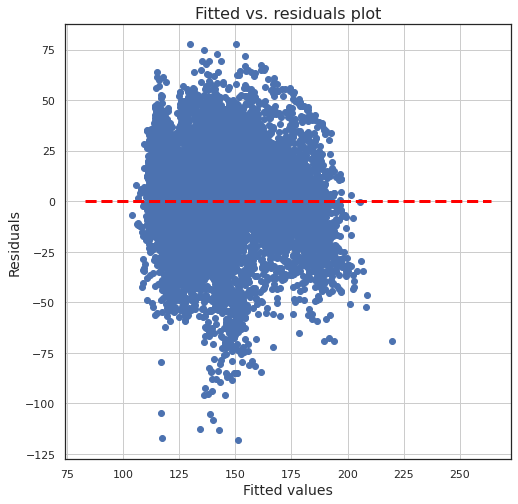

In [ ]:
# Generate a residual plot (residuals vs. fitted value)
plt.figure(figsize=(8,8))
p=plt.scatter(x=results.fittedvalues,y=results.resid)
xmin=min(results.fittedvalues)
xmax = max(results.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.8,xmax=xmax*1.2,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=14)
plt.ylabel("Residuals",fontsize=14)
plt.title("Fitted vs. residuals plot",fontsize=16)
plt.grid(True)
plt.show()

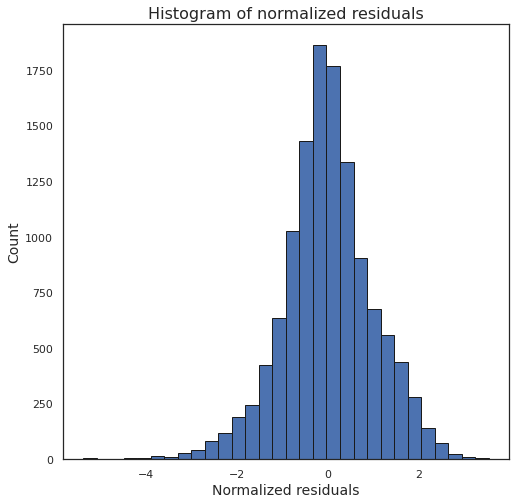

In [ ]:
# Generate a histogram of the residuals
plt.figure(figsize=(8,8))
plt.hist(results.resid_pearson,bins=30,edgecolor='k')
plt.ylabel('Count',fontsize=14)
plt.xlabel('Normalized residuals',fontsize=14)
plt.title("Histogram of normalized residuals",fontsize=16)
plt.show()

<Figure size 576x576 with 0 Axes>

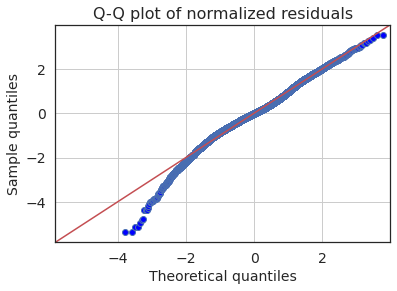

In [ ]:
# generate a q-q plot to check if the residuals are normally distributed
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,8))
fig=qqplot(results.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Theoretical quantiles",fontsize=14)
plt.ylabel("Sample quantiles",fontsize=14)
plt.title("Q-Q plot of normalized residuals",fontsize=16)
plt.grid(True)
plt.show()

#Q.3 Summarizing the multivariate regression by statsmodels

1) From the statsmodels regression the R squared value is 0.450 and the adjusted R squared value is 0.449. The low R squared values indicate that the independent variables were not able to effectively explain the variance in the true and predicted dependent variable values. The biodiversity is most likely more influenced by other unidentified variables. This can be validated from the residual plot. The residual plot captures the variation in biodiversity that the independent variables explain. The residual values should be consistent with random error and should follow a random pattern. In this data the residual values follow a random pattern and no pattern can be seen. There is homoscedasticity therefore the R squared values can be said to be accurate. Follow confirmation using the Q-Q plot and histogram of normalized residuals was done to confirm that the residuals follow the normal distribution and as can be seen from the plots it can be inferred that the biodiversity distribution data has the same shape as the distribution assumed for the OLS which is the normal distribution, this shows that the OLS method is optimum for modelling this data.

2) The RMSE value is approximately 21 for both train and test data. The RMSE is a measure of how spread out from the regression line the true data points are. it is the standard deviation of the residuals. The model with the smallest RMSE would be the best model. In this case we would need to compare the RMSE from the ordinary least square with other models to confirm.

3) Linear Regression Coefficients from shows a different information from the correlation coefficients earlier calculated. The SeasMean can be seen to have the highest coefficient. This means that the mean change of biodiversity is high given a one standard deviation shift of SeasMean. However this values may not be accurate because the LR coefficients are unstandardized. However the LR coefficients tells us how biodiversity varies with the independent variables i.e positively or negatively. From the statsmodels the July mean temperature correlation coefficient is positive contrary to the results from the pearson correlation which is negative. This is most likely as a result of the other unscaled independent variables having an effect on it or as a result of multicollinearity issues which exists within the independent variables. As can be seen from initial analysis some independent variables such as the January and July Temperatures were correlated as well as with other variables like elevation mean, slope mean and standard deviation, latitude and so on. Howbeit, from the statsmodels coefficient data the SeasMean, January Mean Temperature and July Mean Temperature would have the greatest effect on biodiversity in the united states.

4) The linear regression p value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable. This tells us if observations within the sample has any effect on the population. P values less that 0.05 are considered significant and show a non-zero correlation between the dependent and independent variable. From the statsmodels data, all the variables can be said to be significant because they have p values less than 0.05. However, this might not be accurate due to multicollinearity issues.

5) The confidence intervals gives us the lower and upper bounds within which we can be certain the coefficients of our independent variables can be found. For variables with more narrow confidence intervals the model shows greater certainty of their coefficients. The SeasMean, January Mean Temperature and July Mean Temperature have the same confidence intervals. The model has the same certainty for the coefficients of this variables.




Gradient Descent Optimization

[141.75259794] [[ -0.36513711]
 [ -2.54690124]
 [-10.16379503]
 [ -3.6396993 ]
 [ -5.41578408]
 [ -1.41119683]
 [  1.11952782]
 [  1.48440877]
 [  5.73578416]
 [  2.37575574]
 [  1.38083044]
 [ -0.58638956]
 [  1.20517687]
 [  1.80646275]
 [  6.11654826]]
RMSE is 22.289
MAE is 16.849
R squared is 0.43


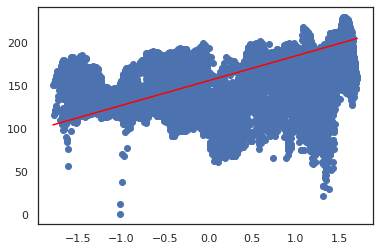

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# initialize the coefficients as 0
Y=biodiv_data['bbsrich']
X=biodiv_data[biodiv_data.columns[:-1]]
w0=0
w1=np.array([0 for _ in range(X.shape[1])]).reshape(-1,1)

eta = 0.01  # the learning Rate. change the learning rate to different values.
epochs = 500  # the number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X
loss=[]
X=preprocessing.scale(X)
Y = Y.values.reshape(-1,1)

# Performing Gradient Descent
for i in range(epochs):
    y_pred=w0+np.matmul(X,w1) # The current predicted value of Y

    J=(sum((Y-y_pred)**2))/(2*n)

    dj_dw0=(1/n)*sum(y_pred-Y) # gradient: delta_J/delta_w0
    dj_dw1=(1/n)*np.sum(X*(y_pred-Y),axis=0).reshape(-1,1) # gradient: delta_J/delta_w1

    w0=w0-eta*dj_dw0 # update w0
    w1=w1-eta*dj_dw1 # update w1
    loss.append(J)

print (w0,w1)

print(f'RMSE is {np.round(mean_squared_error(Y,y_pred,squared=False),3)}')
print(f'MAE is {np.round(mean_absolute_error(Y,y_pred),3)}')
print(f'R squared is {np.round(r2_score(Y,y_pred),3)}')

# plot
plt.scatter(X[:,0], Y)
plt.plot([min(X[:,0]), max(X[:,0])], [min(y_pred), max(y_pred)], color='red')

plt.show()



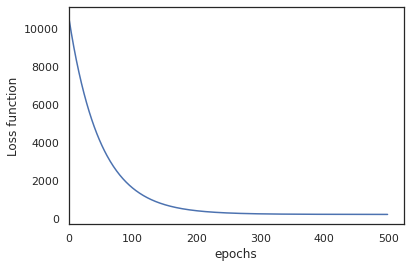

In [ ]:
# plot the loss function varied over epochs. This is a good way to check if the optimization is converging
plt.plot(loss, '-')
plt.xlabel('epochs')
plt.ylabel('Loss function')
plt.xlim(xmin=0);

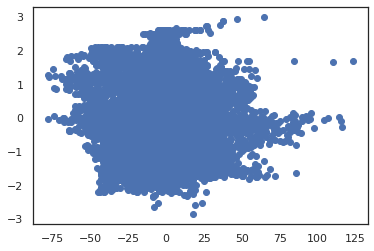

In [ ]:
#Residual plot for gradient descent
plt.scatter(y_pred-Y,X[:,1])

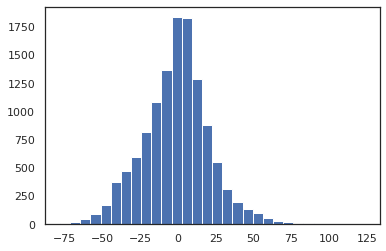

In [ ]:
plt.hist(y_pred-Y,30);

#Ridge Regression

In [ ]:
# perform ridge regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

X=biodiv_data[biodiv_data.columns[:-1]]
Y=biodiv_data['bbsrich']

# standardize the data before ridge regression
Y_norm=preprocessing.scale(Y)
X_norm=preprocessing.scale(X)
X_train,X_test,Y_train,Y_test = train_test_split(X_norm,Y_norm,test_size=0.25) # split the input data as training dataset (75%) and test dataset (25%)


alpha=0.1 # change this hyperparameter to different values to check how it affects the results
ridgereg = Ridge(alpha=alpha,normalize=True)
ridgereg.fit(X_train,Y_train)
y_pred = ridgereg.predict(X_test)


print(np.round(ridgereg.coef_,3)) # print the ridge regression coefficients

print(np.round(mean_squared_error(Y_test,y_pred,squared=False),3))
print(np.round(mean_absolute_error(Y_test,y_pred),3))
print(np.round(r2_score(Y_test,y_pred),3))


[-0.014 -0.092 -0.356 -0.148 -0.183 -0.08   0.063  0.045  0.196  0.073
  0.031 -0.036  0.049  0.083  0.191]
0.756
0.572
0.427


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


#Lasso Regression

In [ ]:
# perform LASSO regression

from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X=biodiv_data[biodiv_data.columns[:-1]]
Y=biodiv_data['bbsrich']

# standardize the data before ridge regression
Y_norm=preprocessing.scale(Y)
X_norm=preprocessing.scale(X)
X_train,X_test,Y_train,Y_test = train_test_split(X_norm,Y_norm,test_size=0.25) # split the input data as training dataset (75%) and test dataset (25%)

alpha=0.001 # change this hyperparameter to different values to check how it affects the results
lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
lassoreg.fit(X_train,Y_train)
y_pred = lassoreg.predict(X_test)

print(np.round(lassoreg.coef_,3)) # print the LASSO regression coefficients (note that some of them could be zero!)

print(np.round(mean_squared_error(Y_test,y_pred,squared=False),3))
print(np.round(mean_absolute_error(Y_test,y_pred),3))
print(np.round(r2_score(Y_test,y_pred),3))


[ 0.    -0.    -0.476  0.    -0.    -0.     0.     0.     0.076  0.
  0.     0.     0.     0.     0.   ]
0.78
0.602
0.387


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Principal Component regression & cross validation**

In [ ]:
# Step 1. perform principal component analysis on X
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# read the data into X, and Y
X=biodiv_data[biodiv_data.columns[:-1]]
Y=biodiv_data['bbsrich']

# standardize the data before ridge regression
Y_norm=preprocessing.scale(Y)
X_norm=preprocessing.scale(X)

# perform PCA on the normalized X
pca = PCA()
X_PCA = pca.fit_transform(X_norm)


In [ ]:
# take a look at the X_PCA - it is the data after PCA transformation (the columns represent 8 principal component axis)
pd.DataFrame(X_PCA)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.372215,-3.788456,0.880679,0.844137,-1.277771,-0.333651,0.711913,-0.495474,-0.593776,0.141404,-0.001033,0.247862,0.221882,0.010976,1.177179e-06
1,0.558962,-3.513345,-0.705104,0.584834,-0.402226,0.575573,0.367269,-0.150670,-0.078593,0.048245,-0.026062,0.000858,0.010707,-0.003782,9.997415e-07
2,6.218470,0.916511,1.404895,-0.689096,1.143776,-1.367591,3.664624,2.177225,0.511605,-0.536454,-1.912996,-1.474636,0.623088,-0.226237,7.746264e-07
3,4.759237,0.617136,1.831158,1.152379,-0.537467,2.127973,0.248517,0.322939,-1.003116,-0.147573,-0.348528,-0.087936,-0.285211,-0.039475,2.302282e-06
4,0.361275,-3.923899,0.495500,0.106853,0.815777,0.634520,0.318024,-0.674486,-0.358236,0.081211,0.082786,0.298907,0.244743,0.016408,8.192790e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12332,-4.353528,4.600978,-0.507445,4.829689,1.692878,-2.862331,-0.816134,-0.038878,-0.342544,-0.048063,-0.037904,-0.016370,-0.147246,-0.110566,-1.267086e-07
12333,-4.318270,4.472095,-0.352312,5.220764,1.764747,-3.096928,-0.908503,-0.071108,-0.389454,0.008572,-0.049895,0.100800,-0.030226,-0.105951,-5.008978e-07
12334,-4.303416,4.484485,-0.375671,5.137518,1.740876,-3.049132,-0.904716,-0.080357,-0.366648,-0.011110,-0.050967,0.103795,-0.029908,-0.108255,-4.865312e-07
12335,-4.242892,4.447556,-0.536964,3.802761,1.416728,-2.256971,-0.888288,0.109788,-0.055966,-0.194568,-0.044123,0.022866,-0.099208,-0.104872,-9.528262e-05


In [ ]:
# check the eigenvectors
pd.DataFrame(pca.components_.T) # a little trick: if you tranform the data array to Dataframe format, it will be much easier to visualize the data. you can try to print out X_PCA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.339673,0.034370,-0.321959,0.064274,-0.031720,0.137756,0.274922,-0.316894,0.013313,0.186606,0.003082,0.054113,0.042332,0.734804,-6.720759e-06
1,-0.200931,0.486280,-0.192357,-0.058258,0.059134,0.019297,0.103492,-0.041789,-0.003753,-0.135123,0.028893,-0.233108,-0.248910,-0.001081,7.287206e-01
2,-0.321920,0.144141,-0.291704,-0.169617,0.052366,-0.011777,0.311497,0.248268,-0.365316,0.286097,0.018079,-0.315184,-0.279254,-0.002730,-4.552095e-01
3,-0.139124,0.246193,0.482448,0.171581,-0.078140,0.320333,0.048016,0.066795,0.398441,0.594428,0.124146,-0.111418,-0.014845,0.046954,-5.703011e-07
4,-0.000233,-0.564383,0.014440,-0.067937,-0.037634,-0.037964,0.129746,0.280420,-0.319692,0.447018,-0.025071,0.051593,0.106072,-0.000870,5.116156e-01
5,0.337095,-0.039239,-0.116205,-0.166149,-0.010044,-0.286504,-0.615598,-0.170797,0.046901,0.339182,0.051473,-0.387511,-0.287812,-0.022517,1.095797e-06
6,0.355456,0.164275,0.127701,-0.136603,0.100212,-0.232398,0.166408,0.279098,-0.039990,-0.033412,0.732548,0.277359,-0.160558,-0.003136,1.452365e-06
7,-0.105437,-0.055379,0.345994,-0.302638,0.691361,0.069056,0.052458,-0.482104,-0.227073,0.059760,0.026384,0.026985,0.001474,0.005515,4.260796e-07
8,0.252288,0.246043,0.200212,0.166333,-0.175965,0.481217,-0.284217,0.048419,-0.673111,-0.077776,0.022673,-0.034097,0.039478,0.006539,5.848527e-07
9,-0.119437,0.069947,0.346958,-0.223788,-0.628660,-0.378028,0.221713,-0.425026,-0.204641,0.015932,-0.000135,0.011385,-0.014043,0.000652,6.598649e-07


In [ ]:
# check the variance ratio of each principal component
pca.explained_variance_ratio_

array([3.89407733e-01, 1.87143927e-01, 1.42687735e-01, 7.41299532e-02,
       6.40297512e-02, 5.00141578e-02, 2.93907980e-02, 2.64949865e-02,
       1.47849351e-02, 1.19776530e-02, 3.95294474e-03, 3.41644013e-03,
       2.40218193e-03, 1.66803296e-04, 1.27599236e-10])

In [ ]:
# check the accumulated variance ratio explained by the principal components. You can see that the first five components can explain 98.15% variance of X data
np.cumsum(pca.explained_variance_ratio_)

array([0.38940773, 0.57655166, 0.71923939, 0.79336935, 0.8573991 ,
       0.90741326, 0.93680406, 0.96329904, 0.97808398, 0.99006163,
       0.99401457, 0.99743101, 0.9998332 , 1.        , 1.        ])

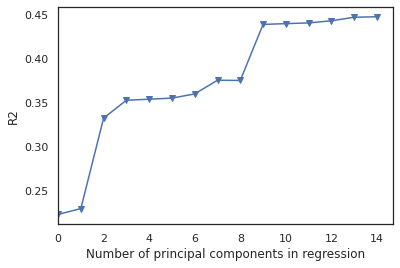

In [ ]:
# Step 2: peform linear regression on principal components using K-fold cross validation
# in this module, we will use k-fold validation method to train the PCR model.

n=pca.components_.shape[0]

# split the data into five folds
kf_5 = KFold(n_splits=5, shuffle=True)


# peform linear regression
LR = LinearRegression()
r2 = []

# Calculate r2 using CV for the 8 principle components, adding one component per iteration.
for i in np.arange(1,n+1):
    score = cross_val_score(LR, X_PCA[:,:i], Y_norm, cv=kf_5, scoring='r2').mean() # We will use r2 to evaluate the model. You can try to use other evaluation criteria.
    r2.append(score)

# Plot results.
# from the plot, you can see that after including five principal components, the model performance would not improve anymore.
# Adding the third component greatly improved the model. If you look at the pca.components_.T as shown above, the third component assign higher weight to the 'median_income' variable.
# As we discussed before, the 'median_income' variable has a strong correlation with y.
plt.plot(r2, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('R2')
plt.xlim(xmin=0);


In [ ]:
# after step 2, we notice that the first five principal components are enough for regression
# here we use five principal components to do regression, and return the model coefficients
# notice that we have 5-fold cross calibration, so we will get 5 groups of coefficients
cv_results = cross_validate(LR, X_PCA[:,:5], Y_norm, cv=kf_5, return_estimator=True)
for model in cv_results['estimator']:
    print(model.coef_)

[ 0.19630954 -0.04874109  0.21573551  0.1303269  -0.04384676]
[ 0.19721307 -0.04300826  0.21367882  0.1403172  -0.04772855]
[ 0.19307087 -0.05060058  0.21940567  0.13425194 -0.0429337 ]
[ 0.19635224 -0.04682909  0.2237827   0.13598328 -0.04437968]
[ 0.19547329 -0.048673    0.22484349  0.13788986 -0.04968963]


#Q.4 Results and Performance of the OLS, Ridge, LASSO and Principal Component regression & cross validation

1) The difference in RMSE, MAE, R squared values between the OLS using scikit learn and gradient descent are discussed below: The RMSE values for the gradient descent observed at a learning rate of 0.01 and epochs of 500 is 22.289. This is greater than the RMSE of the scikit learn OLS which was 21.6. This is most likely because the result from the gradient descent is representative of the entire dataset while 21.6 from the scikit learn analysis represents 25% of the data (test data). The same applies for the MAE and R squared values. After 300 epochs the loss function value did not increase significantly which indicates the optimum number of iterations for the optimum performance of the model i.e reducing the run time, and preventing over fitting. The average sum of the square errors between the predicted and actual values at an epoch of 299 is 278.66. The residual plot of the residuals also show no pattern i.e the residuals maintain a random pattern consistent with random errors, they also follow the normal distribution.

2) The R squared value of the ridge regression is 0.47 which is slighly greater than that of the OLS method. This tells us that for this model 47% of the variance of the dependent variable was explained by the independent variables. The coefficients of the ridge regression are non-zero values, the smaller coeefficient values in the OLS are further minimized in Ridge because the Ridge regression also penalizes the Sum of squares of the coefficients thereby reducing the influence of less important variables, reducing but not eliminating. This whole process also reduces overfitting. By comparing the test and train data we can see that the there is less overfitiing.

3) The R squared value for the ridge regression at 0.387 is smaller than all the other R squares values for the models evaluated above. This reflects the reduction of multicollinearity and redundancy in data caused by correlated independent variables. The coefficients of the lasso regression are almost all zero values,  the smaller coeefficient values in the OLS are eliminated in the Lasso because the Lasso regression also penalizes the Sum of squares of the coefficients thereby eliminating the influence of less important variables. This whole process also reduces overfitting. By comparing the test and train data we can see that the there is less overfitiing/.

4) The PCA analysis deals with the problem of multicollinearity between independent variables as can be seen the redundant or correlated variables are reduced to smaller components and have no correlation between them.

In general it can be seen that the variables in this dataset do not generally effectively represent the overall population relationship of biodiversity within the united states. The Rsquared values estimated for the different models indicates this. To improve the model more representative variables have to be included in the data and redundant variables should be eliminated. Appropriate feature selection will enhance the information retrieved from this dataset. Overall temperature, in terms of July meean, January Mean and Seas Mean seem to have the most effect on biodiversity in the united states.